## Model Optimization

* After running the same hyperparameter tuner model (all inputs and setting the same), our initial EDA identified that utilizing a dataset with replaced cholesterol values would lead to the highest possible accuracy. We then decided to utilize that dataset and try to optimize using keras sequential modeling. This allowed us to have more control over the architecture of each attempt and manually change the number of layers, neurons, activation functions and epochs.

In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import keras_tuner as kt

In [2]:
# Connect to the database
con = sqlite3.connect('resources/heart.sqlite') 

# Run SQL on table         
sql_query = pd.read_sql('SELECT * FROM replaced', con)

# Display query results
sql_query.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Convert SQL to Pandas DataFrame
df_replaced = pd.DataFrame(sql_query, columns = ['Age',
                                        'Sex',
                                        'ChestPainType',
                                        'RestingBP',
                                        'Cholesterol',
                                        'FastingBS',
                                        'RestingECG',
                                        'MaxHR',
                                        'ExerciseAngina',
                                        'Oldpeak',
                                        'ST_Slope',
                                        'HeartDisease']
                 )

# Preview newly created DF
df_replaced.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Split our preprocessed data into our target and features arrays
y = df_replaced['HeartDisease']

# Drop the non-beneficial ID columns, 'HeartDisease'.
X = df_replaced.drop(columns='HeartDisease')

In [6]:
# Convert categorical data to numeric with `pd.get_dummies`
X= pd.get_dummies(X)

# Preview X DataFrame
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [7]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
X_train.shape

(734, 20)

## Attempt 4 - 85.33% accuracy, 40.11% loss

### Base Sequential Model
* This model was created by attempting to mirror the optimal model that came out of our hyperparamter tuning attempt #3
* Utilized 6 hidden layers with the tanh activation function and a sigmoid output layer. Resulting accuracy of a little over 85% was not as good as attempt #3.

In [10]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1

nn_model_4 = tf.keras.models.Sequential()

# First hidden layer
nn_model_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_4.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
nn_model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# Train the model
model_4 = nn_model_4.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.6284 - loss: 0.6794 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.7148 - loss: 0.6628
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 0.7865 - loss: 0.6444
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8200 - loss: 0.6275
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.8234 - loss: 0.6165
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.8189 - loss: 0.6108
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.8390 - loss: 0.5962
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8461 - loss: 0.5834
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8517 - loss: 0.5757
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.8557 - loss: 0.5636
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8449 - loss: 0.5606
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/ste

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 12ms/step - accuracy: 0.8424 - loss: 0.5124
Loss: 0.5123786926269531, Accuracy: 0.842391312122345


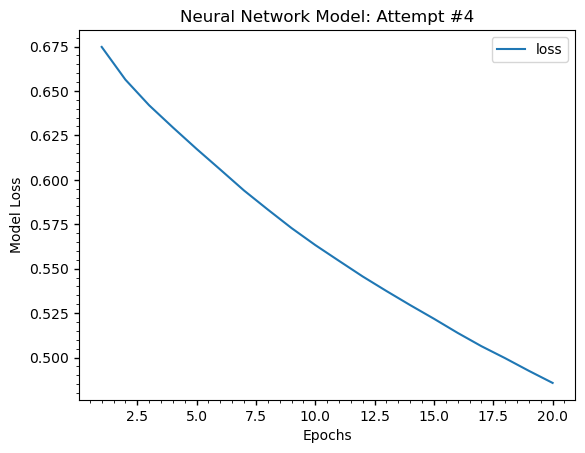

In [28]:
# Create a DataFrame containing training history
a4_df = pd.DataFrame(model_4.history)

# Increase the index by 1 to match the number of epochs
a4_df.index += 1

# Plot the loss
a4_df.plot(y="loss")
plt.title("Neural Network Model: Attempt #4")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)

# Display the plot and save image
plt.savefig("resources/images/neural_net_loss.png", format="png")
plt.show()

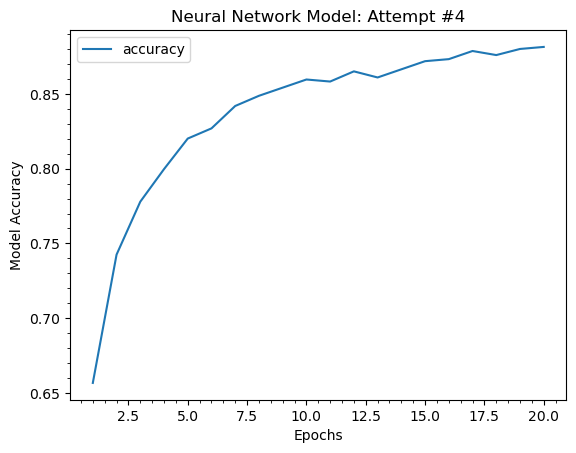

In [27]:
# Plot the accuracy
a4_df.plot(y="accuracy")
plt.title("Neural Network Model: Attempt #4")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()

# Display the plot and save image
plt.savefig("resources/images/neural_net_accuracy.png", format="png")
plt.show()

## Attempt 5 - 84.24% accuracy, 43% loss


### Changing number of layers
* Adding additional layers can give the model additional capacity to capture intricate relationships within the data. Each layer can learn different levels of abstraction, and potentially improving accuracy. Additional layers can be highly beneficial in solving complex problems. Conversely, too many layers may lead to overfitting of the data to the training set. Though we are showing just one attempt at changing the number of layers, we did find that adding additional layers beyond what we show in attempt #4 lead to a decrease in accuracy. Here we reduced the number of layers to see if that creates higher accuracy within the test set. As you can see, accuracy decrease by about 1%.


In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1

nn_model_5 = tf.keras.models.Sequential()

# First hidden layer
nn_model_5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Output layer
nn_model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_5.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compile the model
nn_model_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
model_5 = nn_model_5.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.3053 - loss: 0.7502 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.4494 - loss: 0.7076
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5420 - loss: 0.6843
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.6234 - loss: 0.6656
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - accuracy: 0.7410 - loss: 0.6343
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7515 - loss: 0.6276
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.7687 - loss: 0.6110
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.7943 - loss: 0.5937
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.7843 - loss: 0.5900
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.8079 - loss: 0.5704
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.8327 - loss: 0.5527
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/ste

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 11ms/step - accuracy: 0.8043 - loss: 0.5189
Loss: 0.5189483165740967, Accuracy: 0.804347813129425


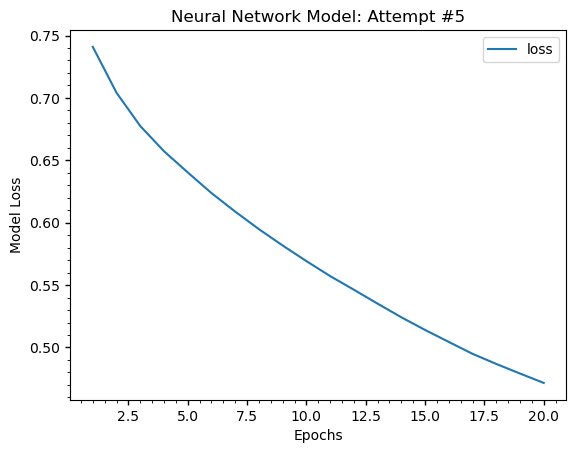

In [25]:
# Create a DataFrame containing training history
a5_df = pd.DataFrame(model_5.history)

# Increase the index by 1 to match the number of epochs
a5_df.index += 1

# Plot the loss
a5_df.plot(y="loss")
plt.title("Neural Network Model: Attempt #5")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a5_loss.png", format="png")
plt.show()

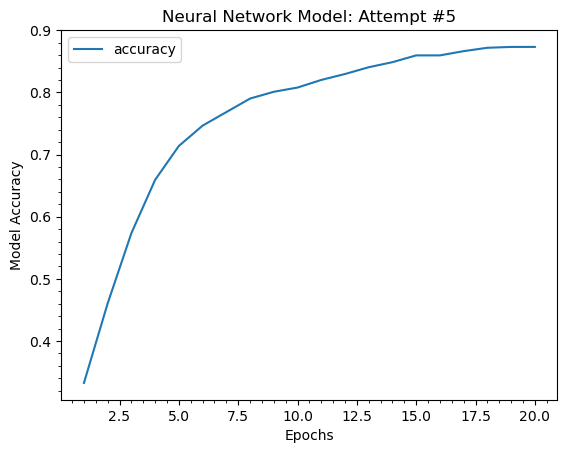

In [26]:
# Plot the accuracy
a5_df.plot(y="accuracy")
plt.title("Neural Network Model: Attempt #5")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a5_accuracy.png", format="png")
plt.show()

## Attempt #6 - 86.96% accuracy, 39.52% loss

### Changing number of epochs, 20 to 80
* In attempt #6 we used the same base architecture as attempt 4 to isolate epochs and control the other variables. Controlling those variables and keeping them the same would allows us to isolate the number of epochs and see if that would result in higher accuracy. An increased number of epochs gives the model more opportunities to learn from the data and adjust weights, but too many may overfit the model to the training dataset. As you can see, increasing the number of epochs from 20 to 80 yielded an increase in accuracy of about 1.5% over attempt #4, but was still unable to achieve the same results as attempt #3 with the hyperparamter tuner. 

In [29]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1

nn_model_6 = tf.keras.models.Sequential()

# First hidden layer
nn_model_6.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_6.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile the model
nn_model_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
# Train the model
model_6 = nn_model_6.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.7787 - loss: 0.5990 
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.8082 - loss: 0.5776
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.8440 - loss: 0.5503
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.8433 - loss: 0.5350
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - accuracy: 0.8503 - loss: 0.5172
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8431 - loss: 0.5152
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8639 - loss: 0.4929
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8451 - loss: 0.4924
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step - accuracy: 0.8696 - loss: 0.4740
Epoch 10/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8895 - loss: 0.4515
Epoch 11/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8888 - loss: 0.4467
Epoch 12/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/ste

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 12ms/step - accuracy: 0.8152 - loss: 0.4850
Loss: 0.4849860668182373, Accuracy: 0.8152173757553101


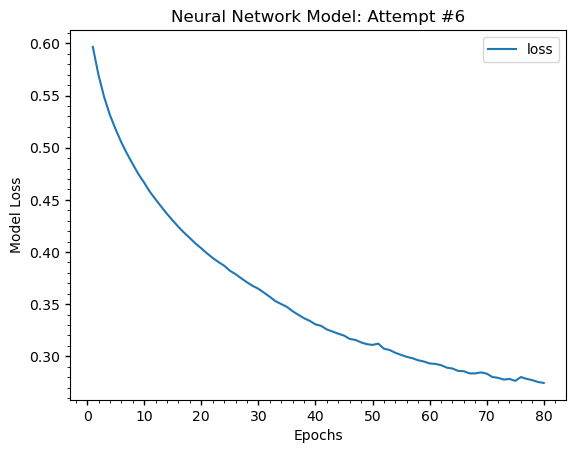

In [33]:
# Create a DataFrame containing training history
a6_df = pd.DataFrame(model_6.history)

# Increase the index by 1 to match the number of epochs
a6_df.index += 1

# Plot the loss
a6_df.plot(y="loss")
plt.title("Neural Network Model: Attempt #6")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a6_loss.png", format="png")
plt.show()

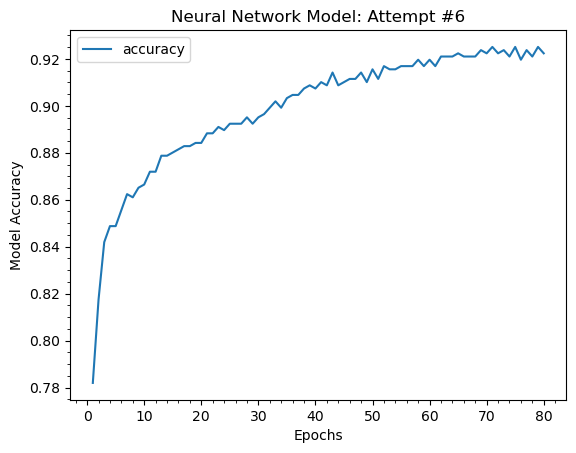

In [34]:
# Plot the accuracy
a6_df.plot(y="accuracy")
plt.title("Neural Network Model: Attempt #6")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a6_accuracy.png", format="png")
plt.show()

## Attempt #7 - 83.15% accuracy, 46.15% loss

### changing activation functions
* 1st hidden layer - tanh
* 2nd hidden layer - tanh
* 3rd hidden layer - relu
* 4th hidden layer - sigmoid
* 5th hidden layer - tanh
* 6th hidden layer - tanh
* output layer - sigmoid

* In attempt #7 we attempted to utilize different activation functions, such as relu and sigmoid in the hidden layers. This can affect how the model interprets and transforms the inputs. Different activation functions have different properties and can capture different types of non-linearities, that may better suit the problem at hand, potentially leading to increased accuracy. In this case, it did not yield an increase in accuracy over prior attempts

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1

nn_model_7 = tf.keras.models.Sequential()

# First hidden layer
nn_model_7.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Fifth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_7.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compile the model
nn_model_7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [37]:
# Train the model
model_7 = nn_model_7.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.5570 - loss: 0.7283 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.5724 - loss: 0.7054
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.5449 - loss: 0.7150
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.5512 - loss: 0.7009
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.5438 - loss: 0.6956
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 496us/step - accuracy: 0.5587 - loss: 0.6780
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.5361 - loss: 0.6784
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5466 - loss: 0.6625
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.5490 - loss: 0.6522
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.5395 - loss: 0.6387
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.5459 - loss: 0.6255
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/ste

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 12ms/step - accuracy: 0.8152 - loss: 0.5505
Loss: 0.5504828095436096, Accuracy: 0.8152173757553101


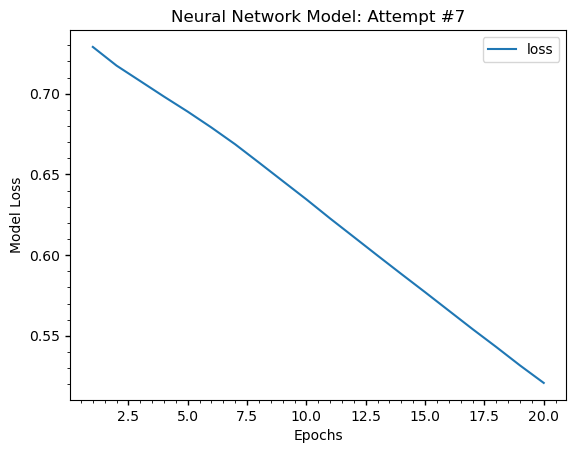

In [41]:
# Create a DataFrame containing training history
a7_df = pd.DataFrame(model_7.history)

# Increase the index by 1 to match the number of epochs
a7_df.index += 1

# Plot the loss
a7_df.plot(y="loss")
plt.title("Neural Network Model: Attempt #7")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a7_loss.png", format="png")
plt.show()

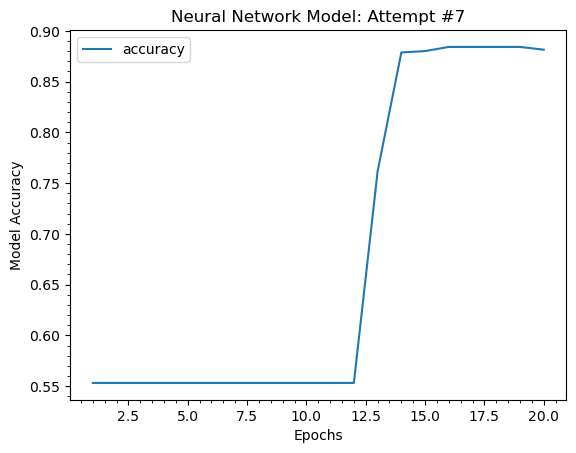

In [42]:
# Plot the accuracy
a7_df.plot(y="accuracy")
plt.title("Neural Network Model: Attempt #7")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a7_accuracy.png", format="png")
plt.show()

## Attempt 8 - 40.22% accuracy, 74.65% loss

### Changing the number of Neurons in each layer
* With attempt #8, we looked at the effect of increasing the number of neurons. All other variables we kept the same as attempt #4 to isolate the change in results. By increasing the number of neurons in a layer, the model can potentiallt capture more complex patterns in the data. This allows for better representation of the underlying relationships between the features and the target variable, potentially leading to higher accuracy. What we found in the results was actually a dramatic decrease in accuracy. It should be mentioned, that we are still utilizing tanh activation functions throughout the hidden layers, so maybe the decreased accuracy would be less with a more blended model, but by simply increasing the number of neurons the effect is clearly negative. 


In [43]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  20
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 10
hidden_nodes_layer5 = 10
hidden_nodes_layer6 = 10

nn_model_8 = tf.keras.models.Sequential()

# First hidden layer
nn_model_8.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fifth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_8.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_8.summary()

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 50)             │         1,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,321 (9.07 KB)

 Trainable params: 2,321 (9.07 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile the model
nn_model_8.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [45]:
# Train the model
model_8 = nn_model_7.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 597us/step - accuracy: 0.8890 - loss: 0.5113
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.8846 - loss: 0.5037
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8925 - loss: 0.4850
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.8852 - loss: 0.4848
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.8829 - loss: 0.4742
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.8999 - loss: 0.4524
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - accuracy: 0.8956 - loss: 0.4457
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.8813 - loss: 0.4498
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - accuracy: 0.9022 - loss: 0.4280
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 576us/step - accuracy: 0.8900 - loss: 0.4269
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 560us/step - accuracy: 0.8998 - loss: 0.4093
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step

In [46]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 20ms/step - accuracy: 0.6685 - loss: 0.6355
Loss: 0.6355465054512024, Accuracy: 0.66847825050354


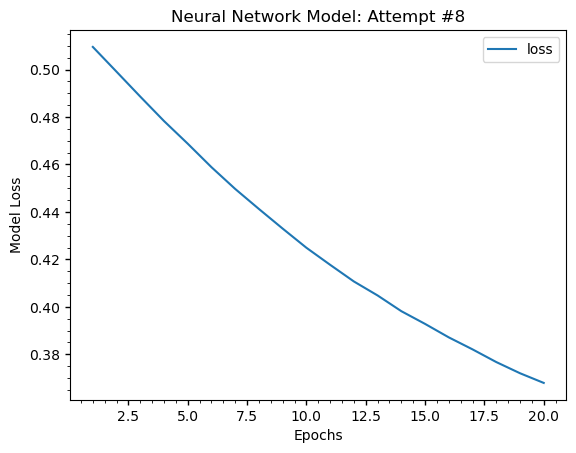

In [48]:
# Create a DataFrame containing training history
a8_df = pd.DataFrame(model_8.history)

# Increase the index by 1 to match the number of epochs
a8_df.index += 1

# Plot the loss
a8_df.plot(y="loss")
plt.title("Neural Network Model: Attempt #8")
plt.xlabel("Epochs")
plt.ylabel("Model Loss")
plt.minorticks_on()
plt.tick_params(width=1)
plt.savefig("resources/images/a8_loss.png", format="png")
plt.show()

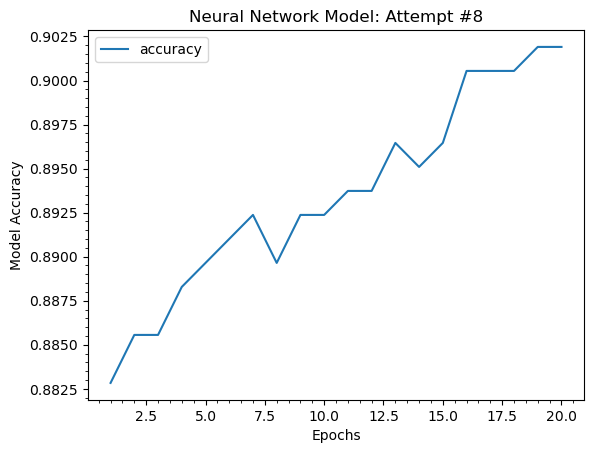

In [50]:
# Plot the accuracy
a8_df.plot(y="accuracy")
plt.title("Neural Network Model: Attempt #8")
plt.xlabel("Epochs")
plt.ylabel("Model Accuracy")
plt.minorticks_on()
plt.savefig("resources/images/a8_accuracy.png", format="png")
plt.show()

In [51]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model_9 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_9.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=10), activation=activation, input_dim=20))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model_9.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model_9.add(tf.keras.layers.Dense(units=1, activation="tanh"))

    # Compile the model
    nn_model_9.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_9

In [52]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

/Users/andrewmack/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [53]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Trial 206 Complete [00h 00m 06s]
val_accuracy: 0.864130437374115

Best val_accuracy So Far: 0.875
Total elapsed time: 00h 10m 20s

Search: Running Trial #207

Value             |Best Value So Far |Hyperparameter
tanh              |tanh              |activation
71                |81                |first_units
8                 |2                 |num_layers
7                 |5                 |units_0
3                 |9                 |units_1
9                 |1                 |units_2
3                 |7                 |units_3
7                 |1                 |units_4
5                 |3                 |units_5
1                 |5                 |units_6
5                 |7                 |units_7
7                 |9                 |units_8
1                 |5                 |units_9
67                |200               |tuner/epochs
23                |67                |tuner/initial_epoch
3                 |4                 |tuner/bracket
2                 |

KeyboardInterrupt: 

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

### logging attempts 
* 9.1 - 88.04% accuracy, 44.89% loss, 508 trials, 26 mins 49 secs
* 9.2 - 88.59% accuracy, 37.00% loss, 762 trials, 45 mins 24 secs
* 9.3 - 88.04% accuracy, 88.13% loss, 508 trials, 27 mins, 27 secs

* 11.1 - 92.93% accuracy: 47.41% loss, 508 trials, 1 hour, 14 mins, 21 secs

### Attempt 11
See 11.1 results above; attempt #11 was made utilizing the cholesterol values in the original data set, rather than the median or mean Cholesterol values as in the earlier model attempts. Of note is that accuracy in this attempt rises slightly above prior attempts, into the nineties.

In [54]:
# Connect to the database
con = sqlite3.connect('resources/heart.sqlite') 

# Run SQL on table         
sql_query = pd.read_sql('SELECT * FROM original', con)

# Display query results
sql_query.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [55]:
# Convert SQL to Pandas DataFrame
df = pd.DataFrame(sql_query, columns = ['Age',
                                        'Sex',
                                        'ChestPainType',
                                        'RestingBP',
                                        'Cholesterol',
                                        'FastingBS',
                                        'RestingECG',
                                        'MaxHR',
                                        'ExerciseAngina',
                                        'Oldpeak',
                                        'ST_Slope',
                                        'HeartDisease']
                 )

# Preview newly created DF
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
# Split our preprocessed data into our target and features arrays
y2 = df['HeartDisease']

# Drop the non-beneficial ID columns, 'HeartDisease'.
X2 = df.drop(columns='HeartDisease')

In [59]:
# Convert categorical data to numeric with `pd.get_dummies`
X2= pd.get_dummies(X2)

# Preview the X2 DataFrame
X2.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [60]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y2, stratify = y, test_size = .2)

In [61]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [62]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model_11 = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model_11.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=10), activation=activation, input_dim=20))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 10)):
        nn_model_11.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model_11.add(tf.keras.layers.Dense(units=1, activation="tanh"))

    # Compile the model
    nn_model_11.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model_11

In [63]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=200,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [64]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=200,validation_data=(X_test_scaled,y_test))

Trial 209 Complete [00h 00m 10s]
val_accuracy: 0.91847825050354

Best val_accuracy So Far: 0.91847825050354
Total elapsed time: 00h 11m 38s

Search: Running Trial #210

Value             |Best Value So Far |Hyperparameter
sigmoid           |tanh              |activation
11                |71                |first_units
1                 |8                 |num_layers
9                 |7                 |units_0
5                 |3                 |units_1
5                 |9                 |units_2
9                 |3                 |units_3
7                 |7                 |units_4
3                 |5                 |units_5
9                 |1                 |units_6
7                 |5                 |units_7
7                 |7                 |units_8
9                 |1                 |units_9
200               |200               |tuner/epochs
67                |67                |tuner/initial_epoch
3                 |3                 |tuner/bracket
3        

KeyboardInterrupt: 

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")